In [655]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from graphviz import Digraph

from random import randrange, random
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, mean_squared_error
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.datasets import load_breast_cancer, load_iris, load_wine
from sklearn.tree import export_graphviz
from IPython.display import Image
np.random.seed(42)

In [839]:
# Load wine data
iris_data = load_wine()

#put dataset into data frame
X = pd.DataFrame(iris_data['data'], columns=iris_data.feature_names)
y = pd.Series(iris_data.target)
# X = data.iloc[:,:3]

In [840]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=42)

In [861]:
n_estimators = np.arange(5, 50, 5)

mean_train_accs = []
mean_test_accs = []

for n_trees in n_estimators:
    trees = [DecisionTreeClassifier(max_depth = 2, random_state=42) for tree in range(n_trees)]
    fits = [tree.fit(X_train, y_train) for tree in trees]

    y_hats_train  = [tree.predict(X_train) for tree in trees]
    y_hats_test  = [tree.predict(X_test) for tree in trees]

    test_accs = [accuracy_score(y_test, y_hat) for y_hat in y_hats_test]
    train_accs = [accuracy_score(y_train, y_hat_train) for y_hat_train in y_hats_train]
    mean_train_accs.append(np.mean(train_accs))
    mean_test_accs.append(np.mean(test_accs))

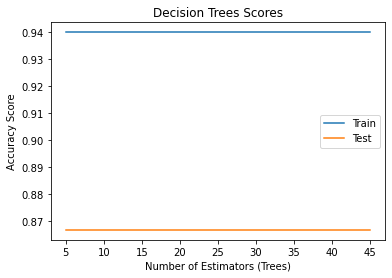

In [863]:
plt.plot(list(n_estimators), mean_train_accs, label = 'Train')
plt.plot(list(n_estimators), mean_test_accs, label = 'Test')
plt.xlabel('Number of Estimators (Trees)')
plt.ylabel('Accuracy Score')
plt.title('Decision Trees Scores')
plt.legend();

In [864]:
def get_viz(tree):
    export_graphviz(tree, "tree.dot")
    !dot -Tpng tree.dot -o tree.png
    return Image('tree.png')

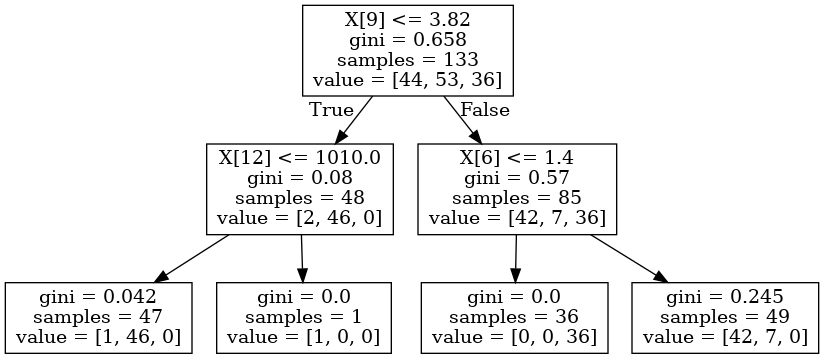

In [865]:
get_viz(trees[0])

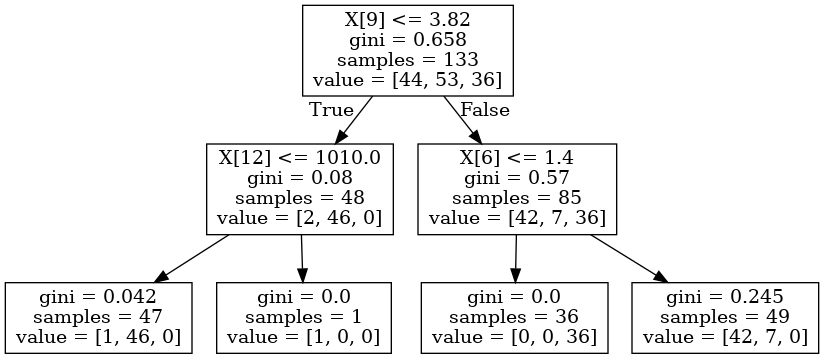

In [866]:
get_viz(trees[1])

We get the exact same tree over and over... so using ensembling method to make a bunch of trees doesn't seem to help us at first glance

## Lets Try Bagging

In [792]:
def bootstrapped_samp(x_train, y_train, ratio=1):
    bootstrap_index= np.random.choice(range(len(X_train)),
                                    len(X_train),
                                    replace=True)
    return x_train[bootstrap_index], y_train[bootstrap_index]


In [867]:
mean_train_accs = []
mean_test_accs = []

for n_trees in n_estimators:
    trees = [DecisionTreeClassifier(max_depth = 2, random_state=42) for tree in range(n_trees)]
    indicies = [np.random.choice(range(len(X_train)), len(X_train),replace=True) for i in range(n_trees)]
    fits = [tree.fit(X_train.values[indicies[i]], y_train.values[indicies[i]]) for i,tree in enumerate(trees)]
    
    y_hats_train  = [tree.predict(X_train.values[indicies[i]]) for i,tree in enumerate(trees)]
    y_hats_test  = [tree.predict(X_test) for tree in trees]

    test_accs = [accuracy_score(y_test, y_hat) for y_hat in y_hats_test]
    train_accs = [accuracy_score(y_train.values[indicies[i]], y_hat_train)\
                  for i, y_hat_train in enumerate(y_hats_train)]

    mean_train_accs.append(np.mean(train_accs))
    mean_test_accs.append(np.mean(test_accs))


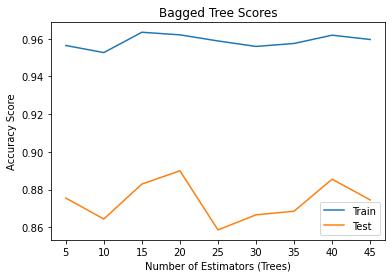

In [868]:
plt.plot(list(n_estimators), mean_train_accs, label = 'Train')
plt.plot(list(n_estimators), mean_test_accs, label = 'Test')
plt.xlabel('Number of Estimators (Trees)')
plt.ylabel('Accuracy Score')
plt.title('Bagged Tree Scores')
plt.legend();

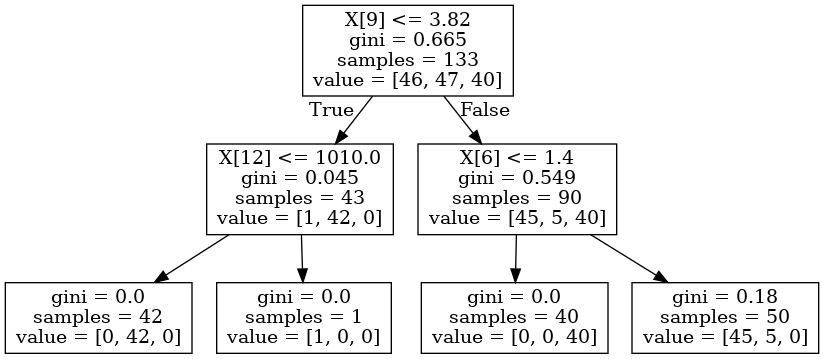

In [869]:
get_viz(trees[0])

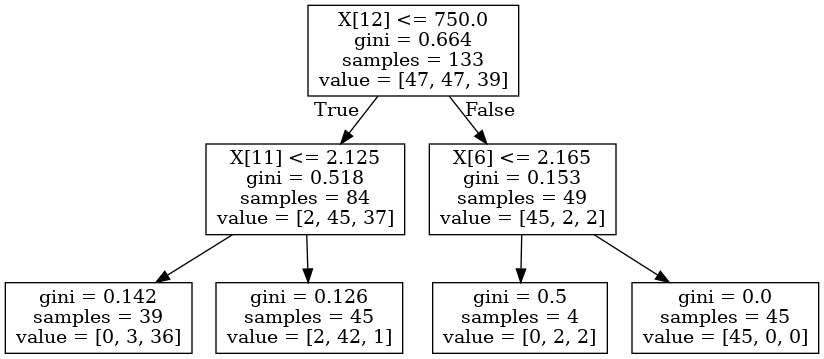

In [870]:
get_viz(trees[11])

In [871]:
n_estimators = np.arange(1, 50, 2)

train_accs = []
test_accs = []

basetree = DecisionTreeClassifier(max_depth = 2, random_state=42)

for n_trees in n_estimators:
    bag = BaggingClassifier(base_estimator=basetree, n_estimators=n_trees)
    bag.fit(X_train, y_train)
    y_hats_test =  bag.predict(X_test)
    y_hats_train =  bag.predict(X_train)

    
    train_accs.append(accuracy_score(y_hats_train, y_train)) 
    test_accs.append(accuracy_score(y_hats_test, y_test))

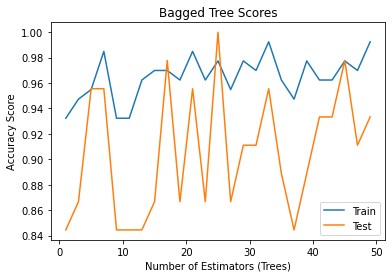

In [872]:
plt.plot(list(n_estimators), train_accs, label = 'Train')
plt.plot(list(n_estimators), test_accs, label = 'Test')
plt.xlabel('Number of Estimators (Trees)')
plt.ylabel('Accuracy Score')
plt.title('Bagged Tree Scores')
plt.legend();

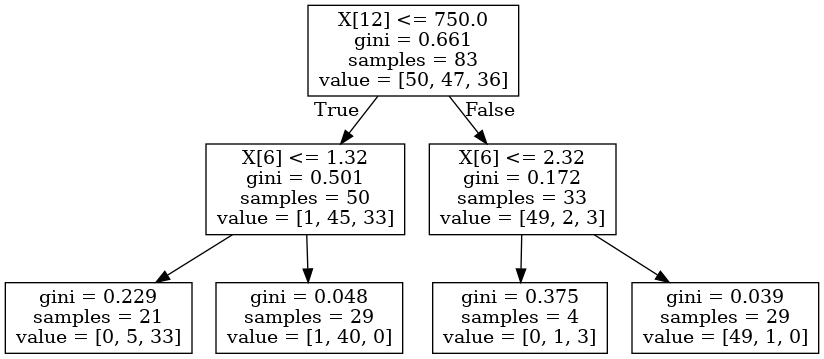

In [873]:
get_viz(bag.estimators_[0])

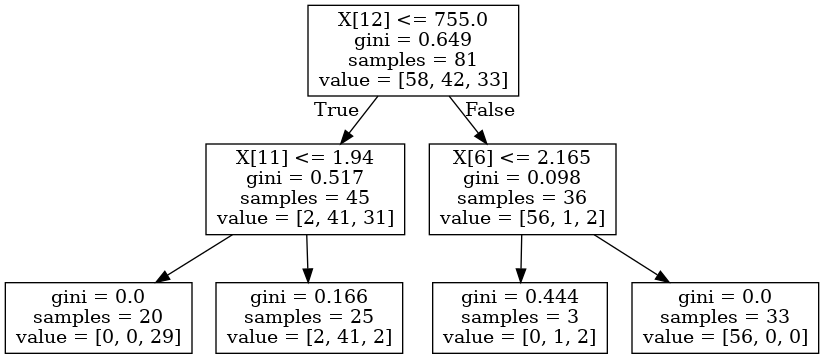

In [874]:
get_viz(bag.estimators_[6])

## Time for a Random Forest

In [ ]:
n_estimators = np.arange(1, 100, 2)
train_accs_rf = []
test_accs_rf = []
for n_trees in n_estimators:
    rf = RandomForestClassifier(n_estimators=n_trees, max_depth = 3)
    rf.fit(X_train, y_train)
    y_hats_test =  rf.predict(X_test)
    y_hats_train =  rf.predict(X_train)
    train_accs_rf.append(accuracy_score(y_hats_train, y_train)) 
    test_accs_rf.append(accuracy_score(y_hats_test, y_test))

In [ ]:
plt.plot(list(n_estimators), train_accs_rf, label = 'Train')
plt.plot(list(n_estimators), test_accs_rf, label = 'Test')
plt.xlabel('Number of Estimators (Trees)')
plt.ylabel('Accuracy Score')
plt.title('Random Forest Scores')
plt.legend();

In [ ]:
get_viz(rf.estimators_[0])

In [ ]:
get_viz(rf.estimators_[4])

## Success Criteria

#### Today I will be successful if I can...
1. Explain bagging in one or two sentences
1. Express why Random Forests work better than traditional Bagging
1. Name 3 of the hyper-parameters are in a random forest
1. Express strengths and weaknesses of a Random Forest Model


### Ensemble Methods

Ensemble methods at it's heart is a combination of many weak predictor machine learning models to form a strong model. 

Example: Betting on the winning horse. (classification example)
Guessing the number of jellybeans in the jar (regression example)
The wisdom of the crowd produces a much better guess than the individual decision. 
For regression, avgerage the predictors
For Classification, Plurality of choice or the average of the percentages for each class


## Random Forest

Decision trees are great, and their easily represented set of rules is a powerful feature for modeling—and even more so for conveying that model to a more general audience. But their high variance and propensity to overfit are serious problems. Luckily, there is a way that you can handle both of those issues and create an even more powerful kind of model.

What if, instead of making one decision tree, you made several? As many as you wanted, really—a whole forest. And what if each tree in the forest got a vote on the outcome for a given observation? Then you'd have a new model type: random forest. Random forests have become an incredibly popular technique for data scientists, because this method tends to be a top performer with low variance and high accuracy in a huge number of circumstances.

Much like decision trees, random forest can be used for both classification and regression problems. The main difference is how the votes are aggregated. As a classifier, the most popular outcome (the mode) is returned. And as a regression, it is typically the average (the mean) that is returned.

- How is splitting determined?

- What would be the difference between a decision tree trained with the same data?

Since Decision Trees are deterministic, they will continously give the same tree over and over when given the same data, this is where we bring back Bootsrapping. 

## Bagging (Bootstrap + Aggregating)

## What is a random forest?

What if, instead of making one decision tree, you made several? As many as you wanted, really—a whole forest. And what if each tree in the forest got a vote on the outcome for a given observation? Then you'd have a new model type: random forest. Random forests have become an incredibly popular technique for data scientists, because this method tends to be a top performer with low variance and high accuracy in a huge number of circumstances.

Much like decision trees, random forest can be used for both classification and regression problems. The main difference is how the votes are aggregated. As a classifier, the most popular outcome (the mode) is returned. And as a regression, it is typically the average (the mean) that is returned.


## Parameters

When building a random forest, you get to set parameters for both the tree and the forest. So for the tree, you have the same parameters as before: you can set the depth of the tree and the number of features used in each rule or split. You can also specify how the tree is built; you can use information gain and entropy like you did before, or you can use other methods, like [Gini impurity](https://www.garysieling.com/blog/sklearn-gini-vs-entropy-criteria).

You also get to control the number of estimators that you want to generate, or the number of trees in the forest. Here you have a tradeoff between how much variance you can explain and the computational complexity. This is pretty easily tunable. As you increase the number of trees in the forest, the accuracy should converge; eventually, the additional learning from another tree approaches zero. There isn't an infinite amount of information to learn; at some point, the trees have learned all they can. So when you have an acceptable variance in accuracy, you can stop adding trees. This becomes worthwhile when you're dealing with large datasets with many variables.

ADVANTAGES

    One of the most accurate learning algorithms available
    It can handle many predictor variables
    Provides estimates of the importance of different predictor variables
    Maintains accuracy even when a large proportion of the data is missing

LIMITATIONS

    Can overfit datasets that are particularly noisy
    For data including categorical predictor variables with different number of levels, random forests are biased in favor of those predictors with more levels. Therefore, the variable importance scores from random forest are not always reliable for this type of data


## Advantages and disadvantages of random forest

The biggest advantage of random forest is its tendency to be a very strong performer. It is reasonably accurate in a myriad of situations, from regression to classification. Some people [really love random forests](https://medium.com/rants-on-machine-learning/the-unreasonable-effectiveness-of-random-forests-f33c3ce28883#.rq8akkff1). However, it does have some disadvantages.

Firstly, in both classification and regression, it will not predict outside of the sample. This means that it will only return values that are within a range that it has seen before. Random forests can also get rather large and slow if you let them grow too wildly.

The biggest disadvantage, however, is the lack of transparency in the process. Random forest is often referred to as a *black-box model*; it provides an output but very little insight into how it got there. You'll run into a few more of these black-box models throughout the program.

Black-box models often make the more statistically minded data scientists nervous. You don't get much insight into the process. You can't see the rules that it's really applying, or what variables it's prioritizing, or how. You don't see any of the internal processes, and you don't get to look "inside the box." Therefore, you also can't represent that process in a simple visual form or learn about the underlying process. You have to trust in the algorithm building the trees and the lack of variance from a large number of them being generated. It usually works out pretty well, and you can of course evaluate the model via other methods to validate your conclusions.

In the next section, you'll walk through an example of the random forest classifier.


ASSUMPTIONS

No formal distributional assumptions, random forests are non-parametric and can thus handle skewed and multi-modal data as well as categorical data that are ordinal or non-ordinal.